In [1]:
import pandas
import numpy as np
import string
import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.optimizers
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.layers.core import Dropout
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt') 
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sudar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [3]:
df = pandas.read_csv('C:/Users/sudar/Desktop/Other/ConferenceIndvPaper/FinalYearProject/Data/training.csv')
print(df)

        ID                                              Tweet    Labels
0        1  NO JOKE I WILL HOP ON A PLANE RN! (Well after ...      0 10
1        2  BanMediaHouse whose is responsible for spreadi...         6
2        3  Im waiting for someone to say to me that all t...       3 4
3        4  He is a liar. Proven day night. Time again. Li...         6
4        5  NEW: U.S. CoronaVirus death toll reaches 4,000...         8
...    ...                                                ...       ...
4995  4996  Life Insurance? I wonder if policies are payin...     4 5 7
4996  4997  My cousin passed away from the corona virus to...       4 5
4997  4998  I guess Mother Nature really hates us. Yellows...  3 5 9 10
4998  4999  So question for the day that isnt related to c...      9 10
4999  5000  Dear corona, If you cancel my fucking church c...      6 10

[5000 rows x 3 columns]


In [4]:
df_validation = pandas.read_csv('C:/Users/sudar/Desktop/Other/ConferenceIndvPaper/FinalYearProject/Data/validation.csv')

In [5]:
df.columns

Index(['ID', 'Tweet', 'Labels'], dtype='object')

In [6]:
df.isnull().sum()

ID        0
Tweet     0
Labels    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(5000, 3)

In [10]:
len(df)

5000

In [11]:
df = df.drop(columns=['ID'])

In [12]:
df.columns

Index(['Tweet', 'Labels'], dtype='object')

In [13]:
df.Labels.nunique() 

264

In [14]:
type(df.Labels[0])

str

In [15]:
df = df.dropna()
df = df.drop(columns=['ID'])
df = df.drop_duplicates()
for i in range(len(df['Labels'])):
    rec_list = df['Labels'][i].split(' ')
    rec_list = list(map(int, rec_list))
    rec_list = round((sum(rec_list)/len(rec_list)))
    if(rec_list<=5):
        rec_list = 'Level1'
    elif(rec_list>5):
        rec_list = 'level2'  
    df['Labels'][i] = rec_list

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   5000 non-null   object
 1   Labels  5000 non-null   object
dtypes: object(2)
memory usage: 246.2+ KB


In [17]:
df.describe()

,Tweet,Labels
count,5000,5000
unique,4954,2
top,Breaking FoxNews Alert : Coronavirus death tol...,level2
freq,9,3185


In [18]:
print(type(df['Labels'][0]))


<class 'str'>


In [19]:
df['Labels'].unique()

array(['Level1', 'level2'], dtype=object)

In [20]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Labels']= label_encoder.fit_transform(df['Labels'])
 
df['Labels'].unique()

array([0, 1])

In [21]:
df.columns

Index(['Tweet', 'Labels'], dtype='object')

In [22]:
df.head()

,Tweet,Labels
0,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0
1,BanMediaHouse whose is responsible for spreadi...,1
2,Im waiting for someone to say to me that all t...,0
3,He is a liar. Proven day night. Time again. Li...,1
4,"NEW: U.S. CoronaVirus death toll reaches 4,000...",1


In [23]:
type(df.Labels[0])

numpy.int32

In [24]:
labels = []


for label in df['Labels']:
  labels.append(label)

print(labels[0])

## Making corresponding text array ##

temp1 = []

for msg in df['Tweet']:
  temp1.append(msg)

print(temp1[0])

0
NO JOKE I WILL HOP ON A PLANE RN! (Well after COVID19 lol)


In [25]:
temp2 = []

for msg in df_validation['Tweet']:
  temp2.append(msg)

print(temp2[0])

Forgot to a math test and I was failing but my teacher opening it back up, maybe corona aint so bad


In [26]:
stop_words = set(stopwords.words('english')) 

train_text = []

for i, msg in enumerate(temp1):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    train_text.append(listToString(filtered_sentence))
    
    

print(train_text[0:20])

['NO JOKE I WILL HOP ON A PLANE RN Well COVID19 lol', 'BanMediaHouse whose responsible spreading Fake communal Stories pandemic Corona situation', 'Im waiting someone say corona thing April fools joke', 'He liar Proven day night Time Lies truth COVID19', 'NEW U S CoronaVirus death toll reaches 4 000 nearly 900 new deaths reported today BNO News Covid19 CoronaVirusOutbreak', 'Coronavirus impact Govt extends I T deadlines related Sections 80C 80D', '42 000 people might died China Covid19 China underreporting according sources', 'Dear Chinese Kindly cook bat thoroughly next time Regards COVID19 CoronaVirusUpdates CoronaVirus', 'This govt kenya checking temperatures COVID19 saying still low Mtashangaa sana', 'My mental health suffered coronavirus quarantine Ha ha April Fools', 'cannot die watching concert live corona virus pls try understand', 'complete wanker I hope die coronavirus You fucking dickhead', 'Has anyone elses FB ads killing since coronavirus hit', 'Just heard Oncle France Cov

In [27]:
stop_words = set(stopwords.words('english')) 

test_text = []

for i, msg in enumerate(temp2):

    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(msg) 

    filtered_sentence = [] 
    
    for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
    
    test_text.append(listToString(filtered_sentence))
    
    

print(test_text[0:20])

['Forgot math test I failing teacher opening back maybe corona aint bad', 'Corona effected came Delhi Bihar lakhisarai district Mahisona village name pappu Khan', 'Make CORONA END NA', 'Imagine coronavirus pandemic big April fools joke government pulled us', 'Howdy Ana Where I get married coronavirus Any update Gov', 'Coronavirus live blog Allergist immunologist Dr Purvi Parikh answers questions', 'We b talking corona hunger killing pple', 'Fuck Corona man I couldve gone vacation next week states shit doesnt exist', 'Female founded companies result less cash hand carry kind unexpected event like COVID19', 'anyone gonna come say Coronavirus April Fools joke', 'Coronavirus pandemic IIT Bombays Spoken Tutorial Project launches helpline mothers stuck home', 'RTRS 31 Mar SHARES OF HSBC SLIDE NEARLY 10 AFTER BRITAIN S TOP BANKS SCRAP DIVIDENDS ON CORONAVIRUS FEARS', 'Ra One Chennai Express producer Karim Morani tests positive coronavirus Bollywood', 'Mary J Blige Brandy What finna tell coron

In [28]:
maxlen = 100
training_samples = 4000
validation_samples = 500
test_samples = 500
max_words = 10000

In [29]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_text)

In [30]:
tokenizer.fit_on_texts(test_text)

In [31]:

train_sequences = tokenizer.texts_to_sequences(train_text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

### Padding the data to make of the same length ###
train_data = pad_sequences(train_sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels.shape)

Found 12210 unique tokens.
Shape of data tensor: (5000, 100)
Shape of label tensor: (5000,)


In [32]:
test_sequences = tokenizer.texts_to_sequences(test_text)
word_index = tokenizer.word_index

### Padding the data to make of the same length ###
test_data = pad_sequences(test_sequences, maxlen=maxlen)

### Shapes ###
labels = np.asarray(labels)
print('Shape of data tensor:', test_data.shape)

Shape of data tensor: (2500, 100)


In [33]:
indices_train = np.arange(train_data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices_train)

train_data = train_data[indices_train]

labels = labels[indices_train]

In [34]:
indices_test = np.arange(test_data.shape[0]) ## makes an array of integers from 0 to 10,314 [0,1, .. , 10314]
np.random.shuffle(indices_test)

test_data = train_data[indices_test]

In [35]:
print(labels)

[0 0 1 ... 0 0 0]


In [36]:
len(labels)

5000

In [37]:
len(train_data)

5000

In [38]:
len(test_data)

2500

In [39]:
x_train = train_data[:training_samples]
y_train = labels[:training_samples]
x_val = train_data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = train_data[training_samples + validation_samples:]
y_test = labels[training_samples + validation_samples:]

In [40]:
#Continue here

In [41]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(x_test))
print(len(y_test))

4000
4000
500
500
500
500


In [42]:
glove_dir = 'C:/Users/sudar/Desktop/Other/ConferenceIndvPaper/FinalYearProject/Data/glove.twitter.27B.100d.txt'

embeddings_index = {}
f = open(glove_dir,encoding='utf')
for line in f:
   values = line.split()
   word = values[0]
   coefs = np.asarray(values[1:], dtype='float32')
   embeddings_index[word] = coefs

f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [43]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
   if(i>=max_words):
       break
   if i < max_words:
       embedding_vector = embeddings_index.get(word)
   if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


c:\Users\sudar\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


125/125 [==============================] - 1s 4ms/step - loss: 0.6672 - acc: 0.6155 - val_loss: 0.6495 - val_acc: 0.6380
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6430 - acc: 0.6425 - val_loss: 0.6392 - val_acc: 0.6460
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6196 - acc: 0.6665 - val_loss: 0.6321 - val_acc: 0.6580
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.6063 - acc: 0.6777 - val_loss: 0.6258 - val_acc: 0.6640
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5938 - acc: 0.6975 - val_loss: 0.6223 - val_acc: 0.6640
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5863 - acc: 0.7067 - val_loss: 0.6164 - val_acc: 0.6660
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5685 - acc: 0.7175 - val_loss: 0.6133 - val_acc: 0.6680
Epoch 8/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5584

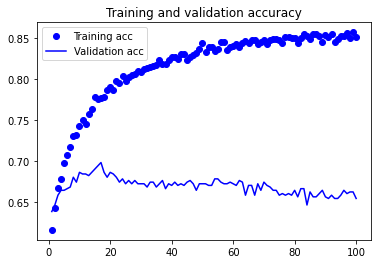

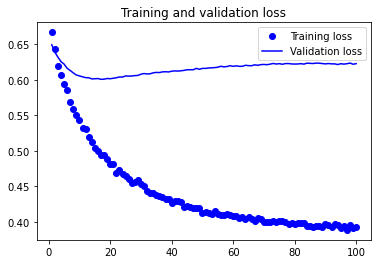

In [44]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu',kernel_initializer = 'VarianceScaling',kernel_constraint = 'UnitNorm',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_initializer = 'VarianceScaling',kernel_constraint = 'UnitNorm',kernel_regularizer=regularizers.l2(0.0001)))
model.summary()


## adding the embeddings layer and freezing it ##

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


## training the model ##

opt = tf.keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer= opt,
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs= 100,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')


## Plotting the results ##

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.6512 - acc: 0.6480


[0.6511909365653992, 0.6480000019073486]

In [64]:
x_test

array([[   0,    0,    0, ...,  840,  970, 8357],
       [   0,    0,    0, ...,    4,   61, 7108],
       [   0,    0,    0, ...,  178,  310, 2590],
       ...,
       [   0,    0,    0, ..., 2546,    1,    5],
       [   0,    0,    0, ..., 9441,    1,    5],
       [   0,    0,    0, ...,    1,   43,   12]])

In [65]:
x_val

array([[   0,    0,    0, ..., 2275,   67,    2],
       [   0,    0,    0, ...,    2,  482, 4059],
       [   0,    0,    0, ...,   46,    1,  101],
       ...,
       [   0,    0,    0, ...,  574, 2624,   69],
       [   0,    0,    0, ...,  511,  102,   56],
       [   0,    0,    0, ..., 1385, 7468,    1]])

In [70]:
y_predict = model.predict(x_test)

In [71]:
y_predict

array([[0.6574117 ],
       [0.9527987 ],
       [0.96729493],
       [0.6698416 ],
       [0.6989831 ],
       [0.9270147 ],
       [0.61966425],
       [0.66637653],
       [0.84491706],
       [0.47588748],
       [0.63165975],
       [0.88726974],
       [0.5697504 ],
       [0.6595037 ],
       [0.85782623],
       [0.82604384],
       [0.9438815 ],
       [0.29133952],
       [0.6064413 ],
       [0.7601404 ],
       [0.673791  ],
       [0.66235036],
       [0.55501366],
       [0.69693995],
       [0.9016713 ],
       [0.74896175],
       [0.9301418 ],
       [0.804443  ],
       [0.78812534],
       [0.94016683],
       [0.6190896 ],
       [0.99566305],
       [0.7854552 ],
       [0.760569  ],
       [0.8450811 ],
       [0.7978625 ],
       [0.7623494 ],
       [0.4974077 ],
       [0.784727  ],
       [0.52771944],
       [0.37546974],
       [0.5509442 ],
       [0.85210115],
       [0.65148026],
       [0.6394361 ],
       [0.91732335],
       [0.7858753 ],
       [0.638

In [78]:
y_pred = round_off_values = np.round_(y_predict)

In [79]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [80]:
y_p = y_pred.astype(int)

In [81]:
y_p

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [68]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
class_names = ['category1','category2']

In [83]:
print(classification_report(y_test, y_p, target_names=class_names))

              precision    recall  f1-score   support

   category1       0.51      0.35      0.41       179
   category2       0.69      0.82      0.75       321

    accuracy                           0.65       500
   macro avg       0.60      0.58      0.58       500
weighted avg       0.63      0.65      0.63       500



In [85]:
print(confusion_matrix(y_test, y_p))


[[ 62 117]
 [ 59 262]]


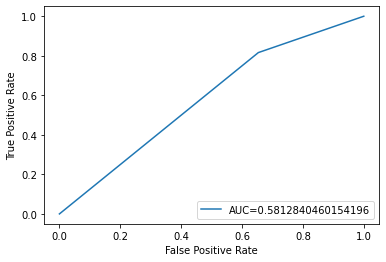

In [86]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_p)
auc = metrics.roc_auc_score(y_test, y_p)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()